In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random

In [39]:
df = pd.read_csv('dmd.csv', index_col=0)

In [5]:
df

,hospid,age,sdate,ck,h,pk,ld,carrier,obsno
1,657,27,6497,22.0,99.000000,10.798828,NaN,0,1
2,667,31,6528,29.0,94.000000,11.798828,NaN,0,1
3,669,22,6558,22.0,85.500000,15.000000,NaN,0,1
4,671,25,6497,41.0,87.296875,15.000000,NaN,0,1
5,673,26,6558,28.0,93.500000,7.000000,NaN,0,1
...,...,...,...,...,...,...,...,...,...
205,1496,32,7288,610.0,111.687500,NaN,593.0,1,1
206,1513,30,7288,510.0,60.195312,NaN,272.0,1,1
207,1531,36,7319,55.0,20.699219,NaN,262.0,1,1
208,1536,31,7319,45.0,13.798828,NaN,217.0,1,1


In [6]:
dataframe = df[['h','pk', 'ck']]

In [7]:
dataframe

,h,pk,ck
1,99.000000,10.798828,22.0
2,94.000000,11.798828,29.0
3,85.500000,15.000000,22.0
4,87.296875,15.000000,41.0
5,93.500000,7.000000,28.0
...,...,...,...
205,111.687500,NaN,610.0
206,60.195312,NaN,510.0
207,20.699219,NaN,55.0
208,13.798828,NaN,45.0


In [8]:
def improve_data(df, replace = 1):
    for column in df:
        if df[column].dtypes == 'object' or df[column].dtypes == 'bool':
            if df[column].isna().sum():
                df[column] = df[column].ffill()
        if df[column].dtypes == 'int64':
            if df[column].isna().sum():
                if replace == 0:
                    df[column] = df[column].fillna(0)
                if replace == 1:
                    df[column] = df[column].fillna(df[column].mean())
                if replace == 2:
                    df[column] = df[column].ffill()
        if df[column].dtypes == 'float64':
            if df[column].isna().sum():
                if replace == 0:
                    df[column] = df[column].fillna(0.0)
                if replace == 1:
                    df[column] = df[column].fillna(df[column].mean())
                if replace == 2:
                    df[column] = df[column].ffill()
    return df

def normalize_data(df, nor = 0):
    for col in df:
        if df[col].dtypes == 'float64':
            if nor == 0:
                Xmax = max(df[col])
                Xmin = min(df[col])
                for i in range(1, len(df[col])+1):
                    df[col][i] = (df[col][i] - Xmin)/(Xmax-Xmin)
            if nor == 1:
                Xmean = df[col].mean()
                sig = df[col].std()
                for i in range(1, len(df[col])+1):
                    df[col][i] = (df[col][i] - Xmean)/sig
    return df

In [9]:
def euklid_dist(dot1, dot2):
    return np.array(np.sqrt(np.subtract(dot1, dot2)**2).sum(axis=1))

In [10]:
def euklid_dist_square(dot1, dot2):
    return np.array((np.subtract(dot1, dot2)**2).sum(axis=1))

In [11]:
def manhattan_dist(dot1, dot2):
    return np.array(abs(np.subtract(dot1, dot2)).sum(axis=1))

In [12]:
def chebishev_dist(dot1, dot2):
    return max(abs(np.subtract(dot1, dot2)))

In [13]:
def power_dist(dot1, dot2, r, p):
    assert(r < 1)
    assert(r > 0)
    return np.array(np.power(np.subtract(dot1, dot2)**p, r).sum(axis=1))

In [14]:
def initialize_centroids(df, K):
    df_tmp = df.copy()
    centroids = []
    for i in range(K):
        centroids.append([random.choice(df_tmp.iloc[:,0]), random.choice(df_tmp.iloc[:,1]), random.choice(df_tmp.iloc[:,2])])
    initialized = pd.DataFrame(centroids, columns=['x', 'y', 'z'])
    return initialized

In [15]:
def closest_centroids(dataframe, centroids):
    distances = []
    for i in range(dataframe.shape[0]):
        distances.append(euklid_dist(dataframe.iloc[i], centroids))
    return np.argmin(distances, axis=1)

In [16]:
def build3d(model):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    cmap = plt.get_cmap("tab10")
    ax.scatter3D(model[1].iloc[:,0], model[1].iloc[:,1], model[1].iloc[:,2], color = "red", alpha=1, s=150)

    for i in range(K):
        globals()['df_%s' % i] = model[0].loc[model[0]['dots']==i]
        ax.scatter3D(globals()['df_%s' % i].iloc[:,0], globals()['df_%s' % i].iloc[:,1], \
                     globals()['df_%s' % i].iloc[:,2], color =cmap(i), alpha=1, label)
        plt.title("Colorful scatter")

In [17]:
dataframe = improve_data(dataframe)
dataframe = normalize_data(dataframe)

c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
def k_means(df_tmp, K):
    c = initialize_centroids(df_tmp, K)
    print(c)
    prev = []
    while True:
        closest = closest_centroids(df_tmp.iloc[:,:3], c)
        
        if np.array_equal(closest, prev):
            break
            
        df_tmp['dots'] = closest
        for i in range(K):
            #c.loc[closest[i]] = (np.array(c.loc[closest[i]]) + np.array(dataframe.iloc[i]))/2.0
            c.loc[i] = np.array((df_tmp.loc[df_tmp['dots']==i].iloc[:, :3]).mean())
        prev = np.copy(closest)
        
        dff = pd.DataFrame(data=df_tmp)
        dff['dots'] = prev
    return [dff, c]

          x         y         z
0  0.573394  0.075547  0.014925
1  0.766915  0.065289  0.002357
2  0.518349  0.079282  0.178319


c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


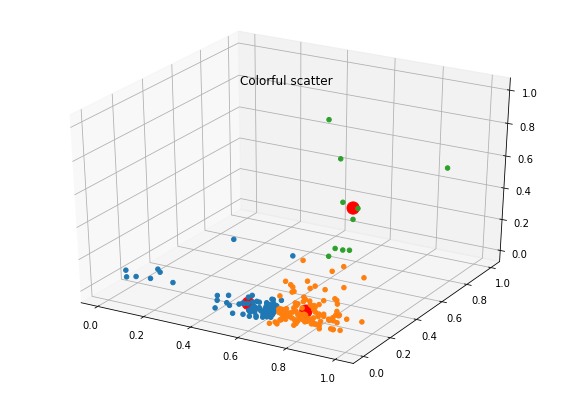

In [19]:
K = 3
model = k_means(dataframe, K)
build3d(model)

          x         y         z
0  0.669725  0.149226  0.069914
1  0.660550  0.166024  0.212883
2  0.816514  0.161360  0.007855
3  0.768779  0.009328  0.069914


c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


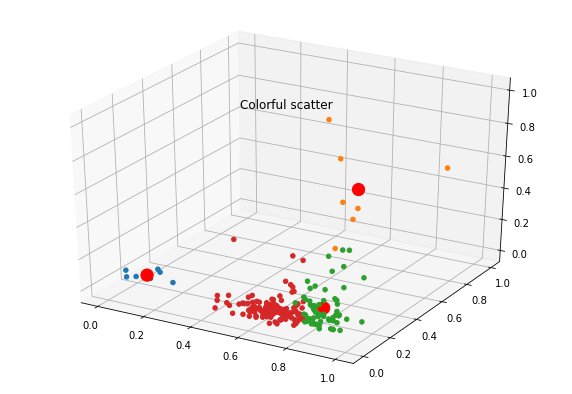

In [20]:
K = 4
model = k_means(dataframe, K)
build3d(model)

          x         y         z
0  0.770642  0.154838  0.019639
1  0.724771  0.029853  0.085625
2  0.709146  0.048509  0.069914
3  0.674312  0.181875  0.044776
4  0.469682  0.116595  0.243519


c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


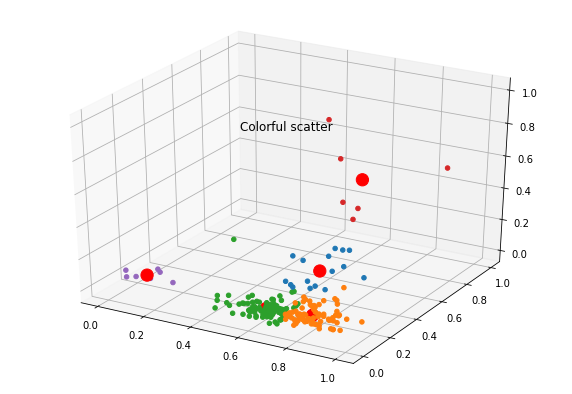

In [21]:
K = 5
model = k_means(dataframe, K)
build3d(model)

<h2>Висновки</h2>

<p>Кількість елементів у кластерах</p>

In [32]:
for i in range(K):
    print('cluster '+str(i)+' have '+str(len(model[0].loc[model[0]['dots']==i]))+' elements')
    print()

cluster 0 have 16 elements
cluster 1 have 83 elements
cluster 2 have 97 elements
cluster 3 have 6 elements
cluster 4 have 7 elements


<p>Statistics</p>

In [40]:
model[0].iloc[:,:3].describe()

,h,pk,ck
count,209.000000,209.000000,209.000000
mean,0.690672,0.123821,0.060692
std,0.156550,0.108690,0.120106
min,0.000000,0.000000,0.000000
25%,0.633028,0.071830,0.011783
50%,0.706422,0.104479,0.020424
75%,0.772362,0.133375,0.045562
max,1.000000,1.000000,1.000000


In [49]:
np.array(df.iloc[int(random.random()),:3])

array([ 657.,   27., 6497.])